<a href="https://colab.research.google.com/github/noctisluna/WQF7004-Group-project/blob/main/WQF7004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  <font size="+3" color='#154085'> <b> 1. Dataset Understanding


### <font size="+2" color='#154085'>**1.1 The context of dataset**



This project's dataset originates from Company XYZ's nationwide supermarket chain in Nigeria. It is an open-source dataset that includes three months of sales data recorded by the company's major branches in three principal cities (Lagos, Abuja, and Port Harcourt) across the country. Each branch's data file contains the same attribute information. Due to increasing competition among supermarkets, the dataset is compiled to assist the company in understanding sales trends and determining its growth.

### <font size="+2" color='#154085'>**1.2 Domain-specific knowledge to interpret the data**

The data displays sales and profit information across different branches and product lines, as well as sales trends over various time periods, such as months and weeks. Our analysis aims to understand the impact of customer types and payment methods on sales and to enhance customer satisfaction. Through these analyses, our goal is to improve products and services to attract and retain customers, identify peak sales periods, and optimize human resources and inventory management.

There is some domain-specific knowledge to better interpret the data.

1.   Retail Operations and Management
- Sales Strategy:
Developing pricing strategies, discount schemes, and understanding how different product lines perform relative to each other.
- Customer Flow Management:
Analyzing the data to determine peak shopping hours, which can help in staffing decisions and operational planning to enhance the shopping experience.
2.   Marketing and Customer Behavior
- Consumer Buying Behavior: Understanding patterns in how different demographics (such as gender or customer type) influence purchasing decisions.
- Loyalty Programs: Evaluating the effectiveness of loyalty programs (e.g., Member vs. Normal customers in the dataset) in increasing customer retention and spend.
3. Financial Analysis in Retail
- Profitability Metrics: Understanding metrics such as unit price, tax 5% and gross income, and how they are calculated from retail transactions.
- Cost of Goods Sold (COGS): Knowing how to calculate and interpret COGS, which is vital for assessing product profitability.


### <font size="+2" color='#154085'>**1.3 Interpretation of dataset variables**

*   **Invoice ID**: Customer identification number
*   **Branch**: Supermarket branches across the country - (A, B, C).   
*   **City**: The location of supermarket
*   **Customer Type**: Type of customers   
Members - Returning customer with membership card,   
Normal - Customer
without membership (could be first-time or walk-in customer)
*   **Gender**: Customer Gender Information
*   **Product line**: Product categorization groups - Electronic accessories, Fashion accessories,   
Food and beverages, Health and beauty, Home and lifestyle, Sports and travel


*  **Unit Price**: Price of each product in Naira


*   **Quantity**: Number of products purchased by customer





*   **Tax**: 5% tax fee for customer buying
*   **Total**: Total income of one produce, including tax (Unit Price * Quantity + Tax)


*   **Date**: Date of purchase (Supermarket Record available from January 2019 to March 2019)

*   **Time**: Purchase time (Supermarket Hours - 10am to 9pm)



*   **Payment**: Payment used by customer for purchase (3 methods are available – Cash, Card and Epay)
*   **COGS**: Cost of goods sold



*   **Gross margin percentage**: Gross margin percentage
*   **Gross income**: Gross income


*   **Rating**: Customer satisfaction rating on their overall shopping experience (On a scale of 1 to 10)


















### <font size="+2" color='#154085'>**1.4 Potential data quality issues**

*   **Data Integrity**: Are all values especially key values like "Invoice ID", "Total" and "Payment" populated? It is necessary to verify whether missing values exist to ensure data integrity.


*  **Outliers**: Does the data set contain outliers? Some fields like "Quantity" and "Total" may contain outliers, which could impact overall analysis results.


*   **Data Consistency**: Are the variables in the dataset consistent? Check whether categorical data such as "Customer type" and "Payment" are used consistently across the dataset.


*  **Data Format**: Are the variables in the dataset standardized? Ensure that all variables, such as "date" and "time", follow a consistent and standardized format, which facilitates time series analysis.




##  <font size="+3" color='#154085'> <b> 2. Preliminaries

### <font size="+2" color='#154085'>**2.1 Data loading and merging**

### <font size="+2" color='#154085'>Load the csv files of each branch


In [1]:
# Import required libraries
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import os
import sys
warnings.filterwarnings('ignore')

In [2]:
# Before this step, we need to add the csv files to the 'content' path of colab
abuja_data = pd.read_csv('/content/Abuja_Branch.csv')
lagos_data = pd.read_csv('/content/Lagos_Branch.csv')
port_harcourt_data = pd.read_csv('/content/Port_Harcourt_Branch.csv')


### <font size="+2" color='#154085'>Gather basic information and descriptive statistics about the data

In [3]:
abuja_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               7000 non-null   object 
 1   Branch                   7000 non-null   object 
 2   City                     7000 non-null   object 
 3   Customer type            7000 non-null   object 
 4   Gender                   7000 non-null   object 
 5   Product line             7000 non-null   object 
 6   Unit price               7000 non-null   float64
 7   Quantity                 7000 non-null   float64
 8   Tax 5%                   7000 non-null   float64
 9   Total                    7000 non-null   float64
 10  Date                     7000 non-null   object 
 11  Time                     7000 non-null   object 
 12  Payment                  7000 non-null   object 
 13  cogs                     7000 non-null   float64
 14  gross margin percentage 

In [4]:
abuja_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,20009.896476,5.478739,5471.571294,114902.992680,109431.421665,4.762002,5471.571122,6.824108
std,9433.332146,2.900522,4151.321201,87177.746429,83026.425080,0.010032,4151.321342,1.711067
min,3812.375868,0.964871,319.484134,6709.481842,6389.983429,4.726114,319.467519,3.980087
25%,11955.596554,2.999092,2044.438423,42933.236191,40888.794755,4.755246,2044.435185,5.299660
50%,19742.402373,5.014388,4332.960486,90992.157279,86659.204234,4.762126,4332.956012,6.699267
75%,27716.408044,8.001756,7952.410115,167000.414217,159048.012147,4.768738,7952.414868,8.208390
max,35985.618526,10.033110,17528.414461,368096.419922,350568.017041,4.798384,17528.425052,10.033158


In [5]:
lagos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               7000 non-null   object 
 1   Branch                   7000 non-null   object 
 2   City                     7000 non-null   object 
 3   Customer type            7000 non-null   object 
 4   Gender                   7000 non-null   object 
 5   Product line             7000 non-null   object 
 6   Unit price               7000 non-null   float64
 7   Quantity                 7000 non-null   float64
 8   Tax 5%                   7000 non-null   float64
 9   Total                    7000 non-null   float64
 10  Date                     7000 non-null   object 
 11  Time                     7000 non-null   object 
 12  Payment                  7000 non-null   object 
 13  cogs                     7000 non-null   float64
 14  gross margin percentage 

In [6]:
lagos_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,19699.334765,5.466872,5350.855533,112367.967154,107017.111477,4.761756,5350.855640,7.027493
std,9394.885207,2.853803,3964.874884,83262.374193,79297.499022,0.010058,3964.874928,1.728876
min,3628.775364,0.970345,217.588973,4570.000588,4352.384024,4.727456,217.602699,3.975199
25%,11609.993494,3.002409,2324.168096,48807.368639,46483.203098,4.754821,2324.165028,5.604390
50%,19141.199788,5.008086,4070.169496,85473.370541,81403.210866,4.761780,4070.167843,7.101916
75%,27021.608197,7.995479,7863.318505,165129.311923,157266.014057,4.768539,7863.319724,8.504663
max,35938.815983,10.028970,17816.420818,374144.411633,356328.019559,4.798761,17816.410956,10.014093


In [7]:
port_harcourt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               7000 non-null   object 
 1   Branch                   7000 non-null   object 
 2   City                     7000 non-null   object 
 3   Customer type            7000 non-null   object 
 4   Gender                   7000 non-null   object 
 5   Product line             7000 non-null   object 
 6   Unit price               7000 non-null   float64
 7   Quantity                 7000 non-null   float64
 8   Tax 5%                   7000 non-null   float64
 9   Total                    7000 non-null   float64
 10  Date                     7000 non-null   object 
 11  Time                     7000 non-null   object 
 12  Payment                  7000 non-null   object 
 13  cogs                     7000 non-null   float64
 14  gross margin percentage 

In [8]:
port_harcourt_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,20357.588597,5.587479,5774.548215,121265.511074,115490.962923,4.762190,5774.548125,7.077725
std,9750.674497,3.015327,4495.567799,94406.924316,89911.356372,0.010063,4495.567988,1.702604
min,3657.579873,0.966745,183.037412,3844.224991,3661.183024,4.722429,183.041285,3.975071
25%,12171.594416,2.997769,2082.412543,43730.808069,41648.396069,4.755146,2082.409683,5.612995
50%,20339.998947,5.992936,4672.795462,98128.798853,93455.996091,4.762194,4672.797930,7.099564
75%,29343.593128,8.004118,8491.146884,178313.945061,169822.811677,4.768985,8491.142842,8.512950
max,35985.618615,10.034730,17874.012586,375354.018707,357480.011536,4.796810,17874.021181,10.028359


### <font size="+2" color='#154085'>View the top five rows of each branch



In [9]:
# print results
print("Abuja Branch Data Preview:")
print(abuja_data.head())

Abuja Branch Data Preview:
    Invoice ID Branch   City Customer type  Gender         Product line  \
0  322-02-2271      B  Abuja        Normal  Female    Sports and travel   
1  574-80-1489      B  Abuja        Member  Female   Food and beverages   
2  725-67-2480      B  Abuja        Member  Female  Fashion accessories   
3  321-49-7382      B  Abuja        Member    Male    Sports and travel   
4  390-80-5128      B  Abuja        Member  Female    Health and beauty   

     Unit price  Quantity       Tax 5%          Total       Date   Time  \
0  15469.204541  2.996315  2320.378278   48727.980305   2/3/2019  11:46   
1  22625.986464  4.023867  4525.203310   95029.205604  2/25/2019  13:22   
2  21150.001979  6.009678  6344.981220  133245.017286  3/24/2019  18:14   
3  31791.589913  0.998932  1589.567319   33381.173224  2/15/2019  17:38   
4   6893.985682  0.996026   344.704209    7238.703460  1/28/2019  17:58   

  Payment           cogs  gross margin percentage  gross income    Rati

In [10]:
print("\nLagos Branch Data Preview:")
print(lagos_data.head())


Lagos Branch Data Preview:
    Invoice ID Branch   City Customer type  Gender         Product line  \
0  105-10-6182      A  Lagos        Member    Male  Fashion accessories   
1  749-24-1565      A  Lagos        Normal  Female    Health and beauty   
2  243-55-8457      A  Lagos        Normal  Female   Food and beverages   
3  291-55-6563      A  Lagos        Member  Female   Home and lifestyle   
4  706-36-6154      A  Lagos        Member    Male   Home and lifestyle   

     Unit price  Quantity        Tax 5%          Total       Date   Time  \
0   7732.809927  2.006231    773.283241   16238.862303  2/27/2019  12:22   
1   8290.795004  9.002090   3730.847847   78348.047509   1/3/2019  12:02   
2  26798.401826  9.980927  13399.204797  281383.218097  2/27/2019  11:40   
3  12391.189418  6.012596   3717.357626   78064.566879  3/30/2019  12:45   
4   6969.603056  9.006349   3136.344316   65862.723784  1/18/2019  18:43   

  Payment           cogs  gross margin percentage  gross income 

In [11]:
print("\nPort Harcourt Branch Data Preview:")
print(port_harcourt_data.head())


Port Harcourt Branch Data Preview:
    Invoice ID Branch           City Customer type  Gender  \
0  457-12-0244      C  Port Harcourt        Member  Female   
1  148-82-2527      C  Port Harcourt        Member  Female   
2  362-58-8315      C  Port Harcourt        Normal    Male   
3  834-25-9262      C  Port Harcourt        Normal  Female   
4  824-88-3614      C  Port Harcourt        Normal    Male   

          Product line    Unit price  Quantity       Tax 5%          Total  \
0    Sports and travel  12679.190353  5.982903  3803.754208   79878.969248   
1   Home and lifestyle   4363.188319  9.992146  2181.608071   45813.605741   
2  Fashion accessories  27547.197508  4.995451  6886.810466  144622.809568   
3  Fashion accessories  29404.801071  4.013894  5880.957917  123500.158683   
4    Health and beauty  12351.608222  7.998554  4940.642648  103753.448269   

        Date   Time Payment           cogs  gross margin percentage  \
0  3/14/2019  13:49    Epay   76075.220865         

**Observation:** We view the first 5 rows of each branch to verify whether the data is read correctly and get a preliminary understanding of the content and value range of each column. It can be observed that the column name and data type of each column conform to the description of the dataset variables. Considering the consistency of column names, we merge the data of the three branches.

### <font size="+2" color='#154085'>Merging the csv files to get our dataset

In [12]:
combined_data = pd.concat([abuja_data, lagos_data, port_harcourt_data], ignore_index=True)

# We rename the original A, B, and C in the 'Branch' column with the corresponding city names for a clearer presentation.
abuja_data['Branch'] = 'Abuja'
lagos_data['Branch'] = 'Lagos'
port_harcourt_data['Branch'] = 'Port Harcourt'

combined_data = pd.concat([abuja_data, lagos_data, port_harcourt_data], ignore_index=True)

# Round the values ​​in the Quantity column
combined_data['Quantity'] = combined_data['Quantity'].round().astype(int)

# Keep the values ​​in the 'rate' column to one decimal place
combined_data['Rating'] = combined_data['Rating'].round(1)


**Note:** We find that the 'Quantity' and 'Rating' columns of the dataset both have long decimals, which we think may be related to errors in the dataset collection. We also find that 'Quantity' is very close to its corresponding integer part, so it can be directly rounded without affecting subsequent analysis. We took one decimal place for 'Rating' to standardize the format.

### <font size="+2" color='#154085'>**2.2 Check the structure and content of our dataset**


In [13]:
# Display first few rows of the dataframe
combined_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,322-02-2271,Abuja,Abuja,Normal,Female,Sports and travel,15469.204541,3,2320.378278,48727.980305,2/3/2019,11:46,Cash,46407.603384,4.769164,2320.381721,9.3
1,574-80-1489,Abuja,Abuja,Member,Female,Food and beverages,22625.986464,4,4525.203310,95029.205604,2/25/2019,13:22,Epay,90503.994053,4.760961,4525.210647,8.7
2,725-67-2480,Abuja,Abuja,Member,Female,Fashion accessories,21150.001979,6,6344.981220,133245.017286,3/24/2019,18:14,Card,126900.004543,4.752448,6345.008446,5.9
3,321-49-7382,Abuja,Abuja,Member,Male,Sports and travel,31791.589913,1,1589.567319,33381.173224,2/15/2019,17:38,Card,31791.606591,4.769830,1589.568757,5.2
4,390-80-5128,Abuja,Abuja,Member,Female,Health and beauty,6893.985682,1,344.704209,7238.703460,1/28/2019,17:58,Card,6893.998786,4.744708,344.689892,9.5


In [14]:
# Display last few rows of the dataframe
combined_data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
20995,408-26-9866,Port Harcourt,Port Harcourt,Normal,Female,Sports and travel,26632.803838,7,9321.481323,195751.066462,3/2/2019,16:42,Epay,186429.615058,4.763165,9321.485800,4.1
20996,280-17-4359,Port Harcourt,Port Harcourt,Member,Male,Health and beauty,32580.008478,10,16289.999576,342089.985450,1/25/2019,13:48,Cash,325800.011435,4.756139,16290.004547,8.1
20997,842-29-4695,Port Harcourt,Port Harcourt,Member,Male,Sports and travel,6170.401156,7,2159.639715,45352.429094,1/16/2019,12:07,Card,43192.793371,4.776234,2159.622460,7.9
20998,277-35-5865,Port Harcourt,Port Harcourt,Member,Female,Food and beverages,35629.211225,9,16033.120336,336695.942606,3/9/2019,11:23,Cash,320662.795852,4.757800,16033.149603,6.7
20999,130-98-8941,Port Harcourt,Port Harcourt,Normal,Male,Fashion accessories,23133.608237,7,8096.755860,170031.963424,2/9/2019,10:00,Cash,161935.198408,4.755214,8096.750897,5.7


**Observation:** We use combined_data.head() and combined_data.tail() view the top/bottom five rows of our dataset. We can see that our dataset has been loaded successfully.

In [15]:
# Gather basic information about the data
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               21000 non-null  object 
 1   Branch                   21000 non-null  object 
 2   City                     21000 non-null  object 
 3   Customer type            21000 non-null  object 
 4   Gender                   21000 non-null  object 
 5   Product line             21000 non-null  object 
 6   Unit price               21000 non-null  float64
 7   Quantity                 21000 non-null  int64  
 8   Tax 5%                   21000 non-null  float64
 9   Total                    21000 non-null  float64
 10  Date                     21000 non-null  object 
 11  Time                     21000 non-null  object 
 12  Payment                  21000 non-null  object 
 13  cogs                     21000 non-null  float64
 14  gross margin percentag

**Observation:** We use .info() to understand the data type, memory usage, and whether there are missing values in the merged dataset. We can see that there are 21000 samples in total, each sample has 17 features, and the data types are float64, and object. There are no missing values. This provides a basic overview for our next step: data preprocessing.

In [16]:
# Gather descriptive statistics about the data
combined_data.describe()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,20022.273279,5.511048,5532.325014,116178.823636,110646.498688,4.761983,5532.324962,6.976400
std,9530.971069,2.924380,4213.235722,88477.951231,84264.715322,0.010052,4213.235846,1.717596
min,3628.775364,1.000000,183.037412,3844.224991,3661.183024,4.722429,183.041285,4.000000
25%,11808.000086,3.000000,2100.409839,44108.806521,42008.392295,4.755057,2100.408287,5.500000
50%,19814.409435,5.000000,4354.541027,91445.743773,87091.179553,4.762016,4354.547166,7.000000
75%,28054.795330,8.000000,8074.804881,169570.807109,161496.004508,4.768766,8074.802402,8.500000
max,35985.618615,10.000000,17874.012586,375354.018707,357480.011536,4.798761,17874.021181,10.000000


**Observation:** We use .describe() to view the basic statistics for each numeric column. The explanation of each parameter in the result is as follows:

1. count: The number of non-null values. Indicates how many non-missing values ​​there are in the column.

2. mean: The average of all values, that is, the sum of the values ​​divided by the number of values.

3. std: The degree of dispersion of the distribution of values. The standard deviation is the square root of the variance, reflecting the average distance of the data points from the mean.

4. min: The minimum value in the data set.

5. 25% Quartile: 25% of the values ​​in the data set are less than or equal to this value.

6. 50% Quartile/Median: 50% of the values ​​in the data set are less than or equal to this value, that is, the median.

7. 75% Quartile: 75% of the values ​​in the data set are less than or equal to this value.

8. max: The maximum value in the data set.

This step helps us identify outliers, understand the range (minimum & maximum values) and distribution (quartiles) of the data, which is crucial for our data preprocessing.

##  <font size="+3" color='#154085'> <b>3. Data Preprocessing


### <font size="+2" color='#154085'>**3.1 Encode categorical variables, handle 'Date' variable, standardize numerical variables, fill missing values if any, remove duplicate rows**

In [17]:
# Check for missing values
combined_data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

**Observation**: There are no missing values in the data.

In [18]:
# Check for duplicates
combined_data.duplicated().sum()

0

**Observation:** There are no duplicates in the data.

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

encoder = LabelEncoder()
scaler = StandardScaler()

# Label encoding for the specified categorial features
for col in ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']:
    combined_data[col] = encoder.fit_transform(combined_data[col])

# Handling 'Date' variable
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data['Year'] = combined_data['Date'].dt.year
combined_data['Month'] = combined_data['Date'].dt.month
combined_data['Day'] = combined_data['Date'].dt.day

numerical_cols = ['Unit price', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income']
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

# Fill missing values ​​for numerical features, if any
if combined_data[numerical_cols].isnull().sum().sum() > 0:
  imputer = SimpleImputer(strategy='mean')
  combined_data[numerical_cols] = imputer.fit_transform(combined_data[numerical_cols])

# Remove Duplicate Rows
combined_data.drop_duplicates(inplace=True)

# Printing Results
print(combined_data.head())
print(combined_data.tail())


    Invoice ID  Branch  City  Customer type  Gender  Product line  Unit price  \
0  322-02-2271       0     0              1       0             5   -0.477724   
1  574-80-1489       0     0              0       0             2    0.273191   
2  725-67-2480       0     0              0       0             1    0.118325   
3  321-49-7382       0     0              0       1             5    1.234879   
4  390-80-5128       0     0              0       0             3   -1.377467   

   Quantity    Tax 5%     Total       Date   Time  Payment      cogs  \
0         3 -0.762365 -0.762365 2019-02-03  11:46        1 -0.762364   
1         4 -0.239043 -0.239044 2019-02-25  13:22        2 -0.239044   
2         6  0.192886  0.192891 2019-03-24  18:14        0  0.192891   
3         1 -0.935825 -0.935822 2019-02-15  17:38        0 -0.935822   
4         1 -1.231297 -1.231298 2019-01-28  17:58        0 -1.231298   

   gross margin percentage  gross income  Rating  Year  Month  Day  
0          

**Observation:** We clean the dataset using data preprocessing technologies. Specifically, we encode categorical variables, transform date features, standardize numerical variables, and remove redundant samples. For any missing values, we fill them with the mean value. We output the top five rows and the bottom five rows of the processed dataset. It can be seen that the six categorical variables 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment' have been correctly encoded as numeric variables. The date feature has been correctly stored as 'year', 'month' and 'day'. The eight numeric variables 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating' have been correctly standardized. There are no missing values ​​or duplicate rows in the dataset.

In [20]:
# Check the information of the dataset after preprocessing
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               21000 non-null  object        
 1   Branch                   21000 non-null  int64         
 2   City                     21000 non-null  int64         
 3   Customer type            21000 non-null  int64         
 4   Gender                   21000 non-null  int64         
 5   Product line             21000 non-null  int64         
 6   Unit price               21000 non-null  float64       
 7   Quantity                 21000 non-null  int64         
 8   Tax 5%                   21000 non-null  float64       
 9   Total                    21000 non-null  float64       
 10  Date                     21000 non-null  datetime64[ns]
 11  Time                     21000 non-null  object        
 12  Payment                  21000 n

**Observation:** It can be seen that each feature has the correct data type and there are no missing values/ duplicate rows after preprocessing. Assuming there are duplicate rows, we can consider using drop_duplicates() to remove the duplicate rows and recheck.

### <font size="+2" color='#154085'>**3.2 Handling outliers**

### <font size="+2" color='#154085'>Detect outliers in numerical variables

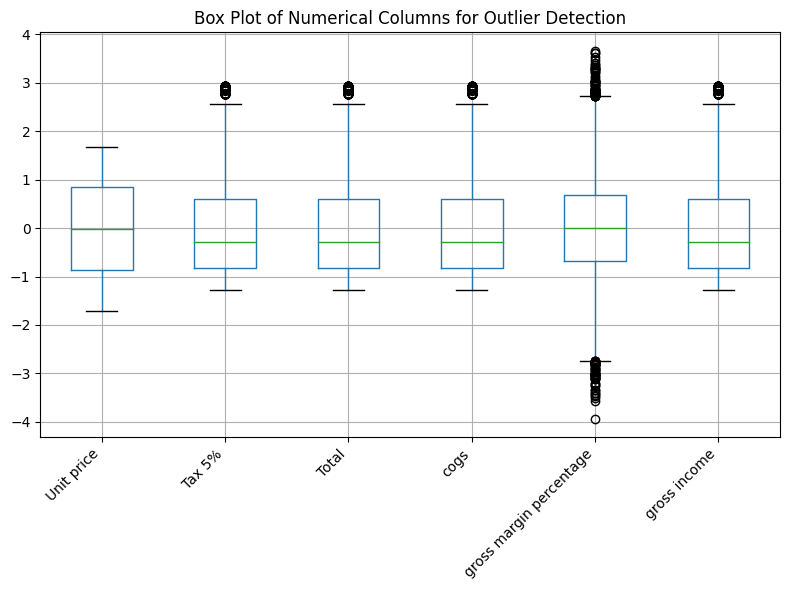

In [21]:

# Create a new figure window with a specified size
plt.figure(figsize=(8, 6))

# Assuming 'combined_data' is a DataFrame and 'numerical_cols' contains the names of numerical columns
combined_data.boxplot(column=numerical_cols)
# Add a descriptive title to the figure
plt.title('Box Plot of Numerical Columns for Outlier Detection')

# Rotate and align the x-axis labels (column names) for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout to ensure adequate spacing between plot elements
plt.tight_layout()

# Display the generated boxplot on the screen
plt.show()


**Observation:** From the box plot, we can see that the 'Tax 5%', 'Total', 'cogs', 'gross margin percentage' and 'gross income' columns show obvious outliers and therefore require special attention.

### <font size="+2" color='#154085'>Remove outliers that are above the upper bound & below the lower bound

In [22]:
# Loop through each numerical column
for col in numerical_cols:
    # Calculate the first quartile (Q1)
    Q1 = combined_data[col].quantile(0.25)
    # Calculate the third quartile (Q3)
    Q3 = combined_data[col].quantile(0.75)
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Calculate the lower bound for outliers
    lower_bound = Q1 - 1.2 * IQR
    # Calculate the upper bound for outliers
    upper_bound = Q3 + 1.2 * IQR
    print(col)
    print("Lower limit:", lower_bound)
    print("Upper limit:", upper_bound)
    # Filter out rows where the column values are within the lower and upper bounds
    combined_data = combined_data[(combined_data[col] >= lower_bound) & (combined_data[col] <= upper_bound)]


Unit price
Lower limit: -2.907477851155534
Upper limit: 2.8884078667223316
Tax 5%
Lower limit: -2.516223241551762
Upper limit: 2.3051131720258744
Total
Lower limit: -2.448670616610703
Upper limit: 2.1540375180141957
cogs
Lower limit: -2.41122788305176
Upper limit: 2.063360986082821
gross margin percentage
Lower limit: -2.312233333566153
Upper limit: 2.302219713775448
gross income
Lower limit: -2.3845368061638155
Upper limit: 2.0095861802484043


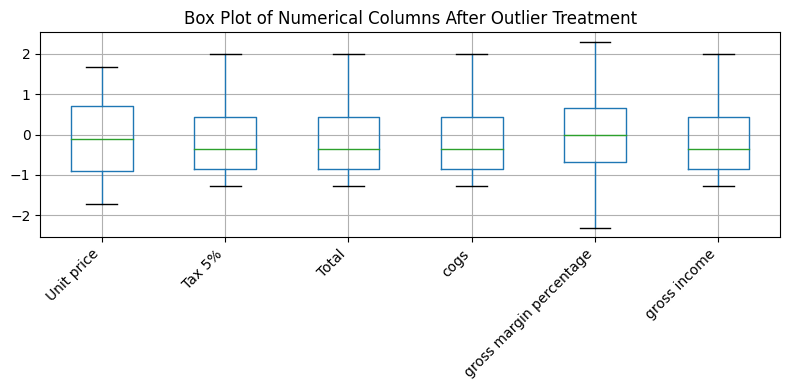

In [23]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Setting the size of the plot
plt.figure(figsize=(8, 4))

# Creating a box plot of numerical columns in combined_data DataFrame
# where numerical_cols contains the list of numerical column names
combined_data.boxplot(column=numerical_cols)

# Setting the title of the plot
plt.title('Box Plot of Numerical Columns After Outlier Treatment')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjusting the layout of the plot to prevent overlapping of elements
plt.tight_layout()

# Display
plt.show()


**Observation:** After we remove the outliers that are above the upper bound & below the lower bound, we can see from the box plot that the numerical features are reasonably distributed.

### <font size="+2" color='#154085'>Detect outliers in categorical variables

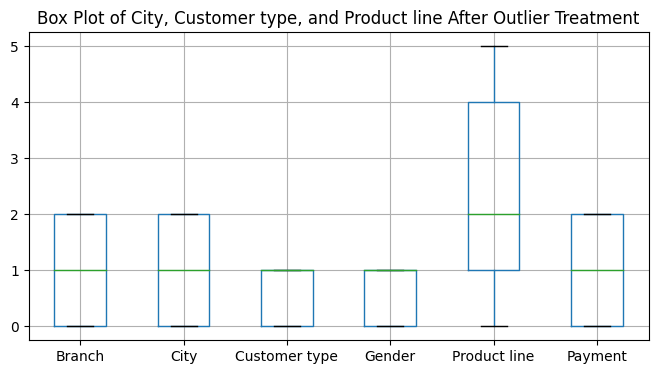

In [24]:
# Setting the size of the figure to 10 inches by 6 inches
plt.figure(figsize=(8, 4))

# Creating box plots for the 'City', 'Customer type', and 'Product line' columns from the combined_data DataFrame
combined_data.boxplot(column=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'])

# Setting the title of the plot
plt.title('Box Plot of City, Customer type, and Product line After Outlier Treatment')

# Display
plt.show()

**Observation:** We conduct outlier detection on six categorical variables: 'Branch', 'city', 'Customer type', 'Gender', 'Product line', and 'Payment'. It can be seen that the data of each city is distributed between 0 and 2, which is consistent with branch. The customer types and genders are mainly concentrated between 0 and 1, while the product line has a wide range of distribution from 0 to 5. Payment is concentrated between 0 and 2. There are no significant outliers. In general, the distribution such as cities and customer types is more concentrated, while the product lines show greater diversity. **This information helps us to understand the distribution of different variables and provides a basis for further business analysis and decision making. Now we can perform Exploratory Data Analysis (EDA).**

##  <font size="+3" color='#154085'> <b>4. Exploratory Data Analysis (EDA)

### <font size="+2" color='#154085'>**Feature Engineering: Feature Selection**

**Invoice ID:** This feature is the customer's personal privacy, for ethical reasons, we do not use this feature for analysis

**Branch, City:** This analysis is not related to geographical location, but we use 'City' variable to better understand the distribution of 'unit price', 'gross income', 'Product line' and 'Rating' variables in the univariate analysis.

**Customer type:** We believe that this feature is related to profit and requires analysis

**Gender:** This feature is the customer's personal privacy, for ethical reasons, we do not use this feature for analysis

**Product line:** We believe that this feature is related to profit and requires analysis

**Unit price:** We believe that this feature is related to profit and requires analysis

**Quantity:** We believe that this feature is related to profit and requires analysis

**Tax 5%:** The tax rate is a fixed percentage value that is collinear with the price. Not participating in analysis

**Total:** The calculation method is "unit price * quantity+tax", which is collinear with the price. It does not participate in the analysis

**Date:** We believe that this feature is related to profit and requires analysis

**Time:** We believe that this feature is related to profit and requires analysis

**Payment:** We believe that this feature is related to profit and requires analysis

**Cogs:** We believe that this feature is related to profit and requires analysis

**Gross margin percentage:** The standard deviation of the profit percentage is almost 0, so we can consider it as a fixed value. Not participating in analysis

**Gross income:** We believe that this feature is related to profit and requires analysis

**Rating:** We believe that customer feedback may affect profits, which is a reasonable characteristic


In [25]:
combined_data = combined_data.drop(columns=['Invoice ID', 'Branch', 'City', 'Gender', 'Tax 5%', 'Total', 'gross margin percentage'])
combined_data.head()

,Customer type,Product line,Unit price,Quantity,Date,Time,Payment,cogs,gross income,Rating,Year,Month,Day
0,1,5,-0.477724,3,2019-02-03,11:46,1,-0.762364,-0.762364,9.3,2019,2,3
1,0,2,0.273191,4,2019-02-25,13:22,2,-0.239044,-0.239042,8.7,2019,2,25
2,0,1,0.118325,6,2019-03-24,18:14,0,0.192891,0.192893,5.9,2019,3,24
3,0,5,1.234879,1,2019-02-15,17:38,0,-0.935822,-0.935825,5.2,2019,2,15
4,0,3,-1.377467,1,2019-01-28,17:58,0,-1.231298,-1.231300,9.5,2019,1,28


### <font size="+2" color='#154085'>**4.1 Univariate analysis**

### <font size="+2" color='#154085'>4.1.1 Customer type

Customer type
1    9758
0    9713
Name: count, dtype: int64


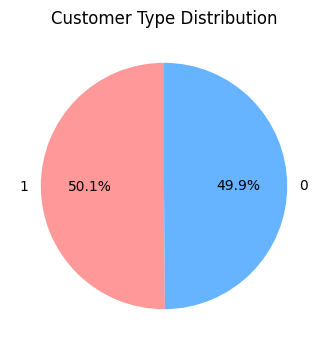

In [26]:
# Descriptive Analysis
customer_type_counts = combined_data['Customer type'].value_counts()
print(customer_type_counts)

# Draw a pie chart
plt.figure(figsize=(4, 4))
customer_type_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Customer Type Distribution')
plt.ylabel('')
plt.show()


### <font size="+2" color='#154085'>4.1.2 Product line

Product line
1    3501
0    3335
2    3324
5    3224
4    3108
3    2979
Name: count, dtype: int64


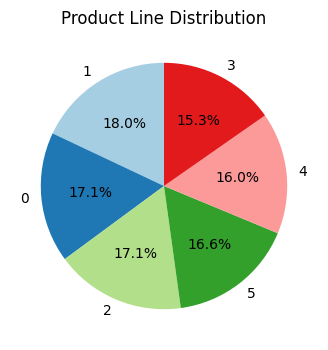

In [27]:
# Descriptive Analysis
product_line_counts = combined_data['Product line'].value_counts()
print(product_line_counts)

# Draw a pie chart
plt.figure(figsize=(4, 4))
product_line_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Product Line Distribution')
plt.ylabel('')
plt.show()


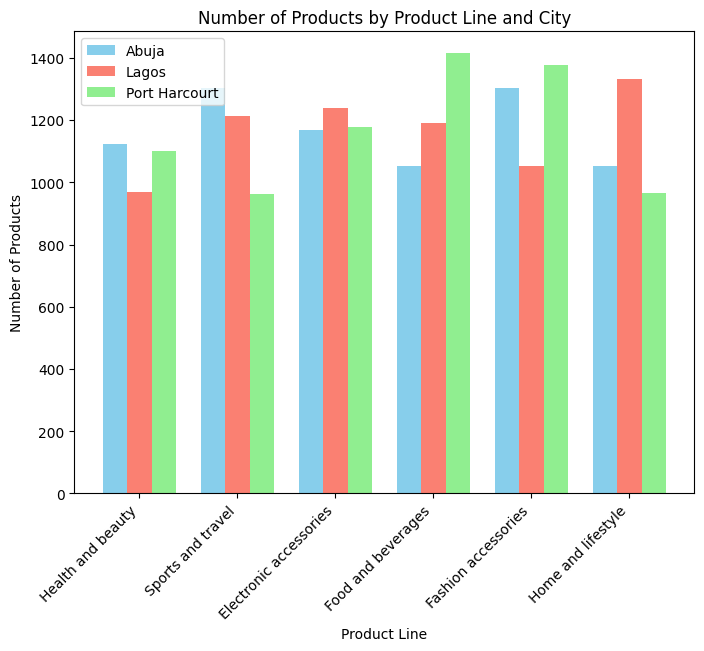

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Count the number of products for the product line in each city
abuja_product_line_count = abuja_data['Product line'].value_counts()
lagos_product_line_count = lagos_data['Product line'].value_counts()
port_harcourt_product_line_count = port_harcourt_data['Product line'].value_counts()

# Get all product lines
product_lines = list(set(abuja_product_line_count.index).union(set(lagos_product_line_count.index)).union(set(port_harcourt_product_line_count.index)))

# Set the position of the histogram
x = np.arange(len(product_lines))
width = 0.25

plt.figure(figsize=(8, 6))

# Plot bar charts for each city and adjust their position
plt.bar(x - width, [abuja_product_line_count.get(pl, 0) for pl in product_lines], width=width, color='skyblue', label='Abuja')
plt.bar(x, [lagos_product_line_count.get(pl, 0) for pl in product_lines], width=width, color='salmon', label='Lagos')
plt.bar(x + width, [port_harcourt_product_line_count.get(pl, 0) for pl in product_lines], width=width, color='lightgreen', label='Port Harcourt')

plt.title('Number of Products by Product Line and City')
plt.xlabel('Product Line')
plt.ylabel('Number of Products')
plt.xticks(x, product_lines, rotation=45, ha='right')
plt.legend()
plt.show()


### <font size="+2" color='#154085'>4.1.3 Unit price

count    19471.000000
mean        -0.076893
std          0.972151
min         -1.720065
25%         -0.904553
50%         -0.114352
75%          0.717021
max          1.674932
Name: Unit price, dtype: float64


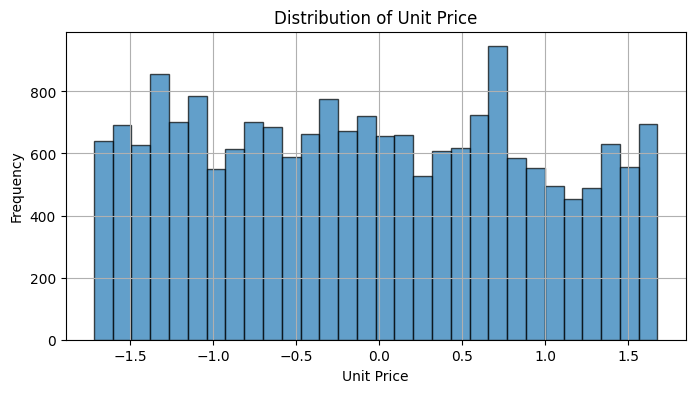

In [29]:
# Perform descriptive statistics on the 'Unit price' column
unit_price_stats = combined_data['Unit price'].describe()
print(unit_price_stats)

# Draw a histogram
plt.figure(figsize=(8, 4))
plt.hist(combined_data['Unit price'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


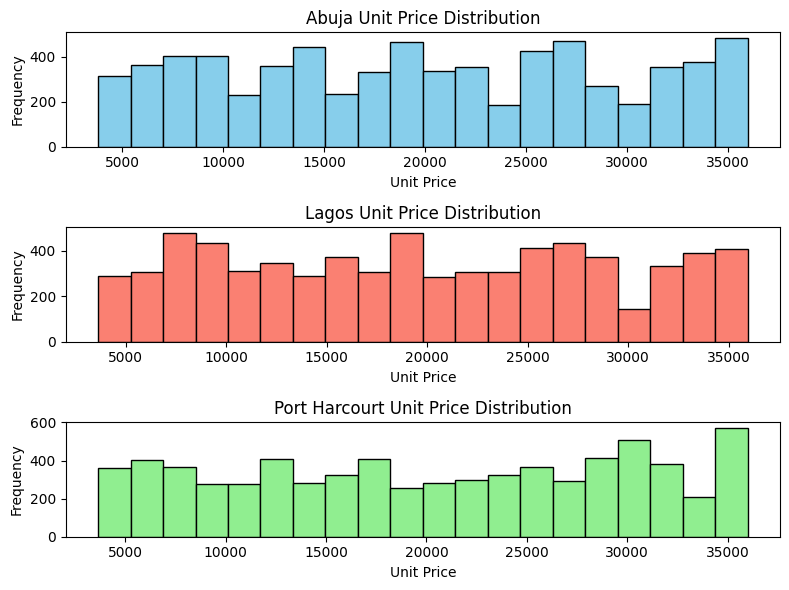

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot the distribution of unit prices for different cities using different subplots
plt.subplot(3, 1, 1)
plt.hist(abuja_data['Unit price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Abuja Unit Price Distribution')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(lagos_data['Unit price'], bins=20, color='salmon', edgecolor='black')
plt.title('Lagos Unit Price Distribution')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(port_harcourt_data['Unit price'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Port Harcourt Unit Price Distribution')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### <font size="+2" color='#154085'>4.1.4 Quantity

count    19471.000000
mean         5.292743
std          2.842821
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: Quantity, dtype: float64


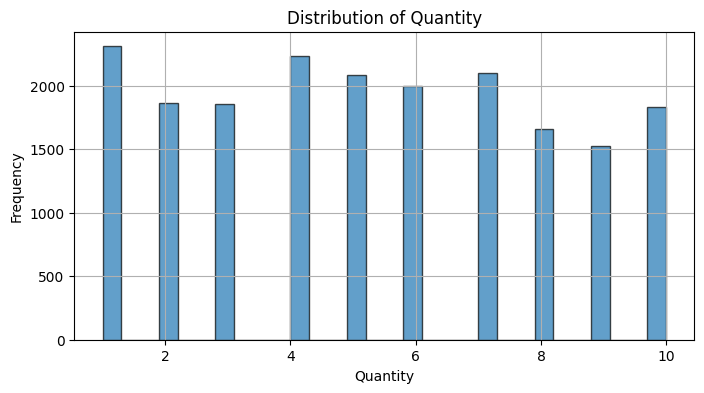

In [31]:
# Perform descriptive statistics on the 'Quantity' column
quantity_stats = combined_data['Quantity'].describe()
print(quantity_stats)

# Draw a histogram
plt.figure(figsize=(8, 4))
plt.hist(combined_data['Quantity'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### <font size="+2" color='#154085'>4.1.5 Time

In [32]:
# Convert the 'Time' column to numeric hours and minutes
combined_data['Hour'] = pd.to_datetime(combined_data['Time'], format='%H:%M').dt.hour
combined_data['Minute'] = pd.to_datetime(combined_data['Time'], format='%H:%M').dt.minute
combined_data['Time_in_Minutes'] = combined_data['Hour'] * 60 + combined_data['Minute']

# Descriptive statistics analysis
time_stats = combined_data['Time_in_Minutes'].describe()
print(time_stats)

count    19471.000000
mean       924.783781
std        191.718725
min        600.000000
25%        762.000000
50%        920.000000
75%       1097.000000
max       1259.000000
Name: Time_in_Minutes, dtype: float64


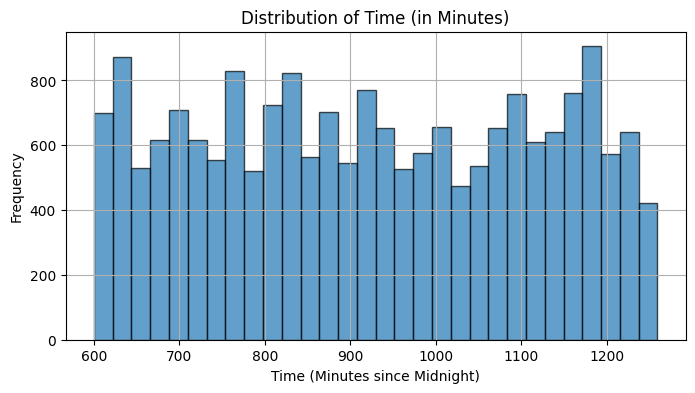

In [33]:
# Draw a histogram
plt.figure(figsize=(8, 4))
plt.hist(combined_data['Time_in_Minutes'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Time (in Minutes)')
plt.xlabel('Time (Minutes since Midnight)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

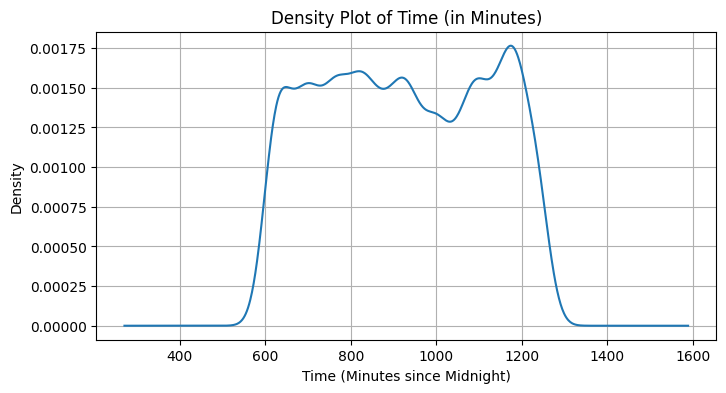

In [34]:
# Draw a density map
plt.figure(figsize=(8, 4))
combined_data['Time_in_Minutes'].plot.kde()
plt.title('Density Plot of Time (in Minutes)')
plt.xlabel('Time (Minutes since Midnight)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


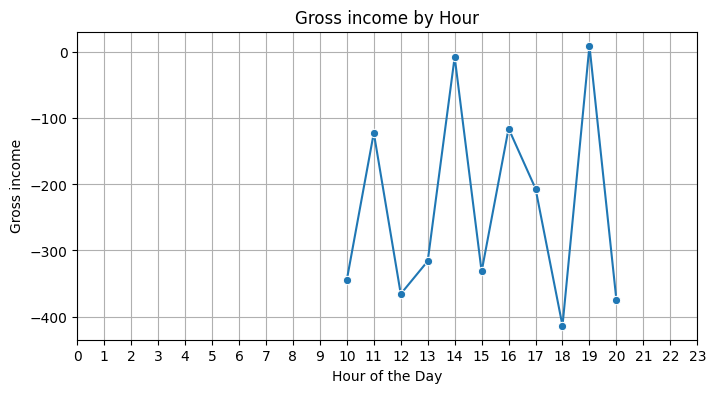

In [35]:
import seaborn as sns

# Convert the 'Time' column to datetime format
combined_data['Time'] = pd.to_datetime(combined_data['Time'])

# Extract the hour from the 'Time' column and add it as a new column 'Hour'
combined_data['Hour'] = combined_data['Time'].dt.hour

# Group the data by 'Hour' and calculate the total sales for each hour
sales_by_hour = combined_data.groupby('Hour')['gross income'].sum().reset_index()

plt.figure(figsize=(8, 4))

# Create a line plot for total sales by hour
sns.lineplot(x='Hour', y='gross income', data=sales_by_hour, marker='o')

plt.title('Gross income by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Gross income')
plt.xticks(range(24))  # Ensure x-axis has ticks for each hour from 0 to 23
plt.grid(True)

plt.show()


### <font size="+2" color='#154085'>4.1.6 Payment

Payment
2    6793
1    6688
0    5990
Name: count, dtype: int64


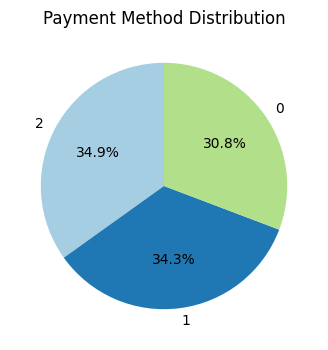

In [36]:
# Perform descriptive statistics on the 'Payment' column
payment_counts = combined_data['Payment'].value_counts()
print(payment_counts)

# Draw a pie chart
plt.figure(figsize=(4, 4))
payment_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()


### <font size="+2" color='#154085'>4.1.7 cogs

count    19471.000000
mean        -0.132914
std          0.848220
min         -1.269664
25%         -0.840548
50%         -0.360592
75%          0.442396
max          2.000523
Name: cogs, dtype: float64


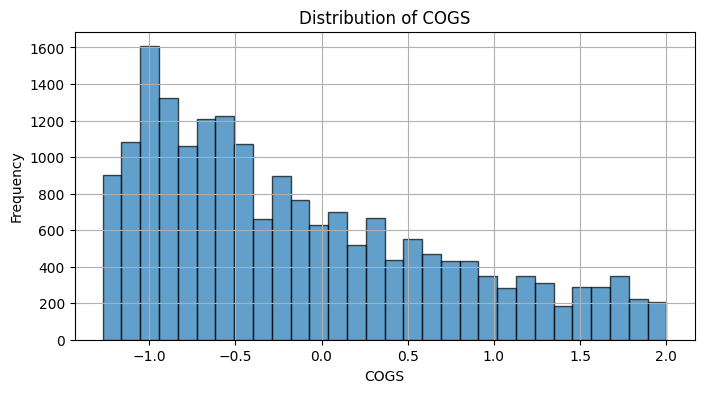

In [37]:
# Perform descriptive statistics on the 'cogs' column
cogs_stats = combined_data['cogs'].describe()
print(cogs_stats)

# Draw a histogram
plt.figure(figsize=(8, 4))
plt.hist(combined_data['cogs'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of COGS')
plt.xlabel('COGS')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

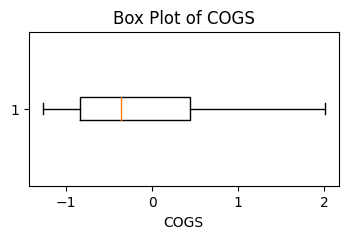

In [38]:
# Draw a box plot
plt.figure(figsize=(4, 2))
plt.boxplot(combined_data['cogs'], vert=False)
plt.title('Box Plot of COGS')
plt.xlabel('COGS')
plt.show()


### <font size="+2" color='#154085'>4.1.8 Gross income

In [39]:
# Perform descriptive statistics on the 'Gross income' column
gross_income_stats = combined_data['gross income'].describe()
print(gross_income_stats)

count    19471.000000
mean        -0.132914
std          0.848220
min         -1.269668
25%         -0.840545
50%         -0.360592
75%          0.442398
max          2.000527
Name: gross income, dtype: float64


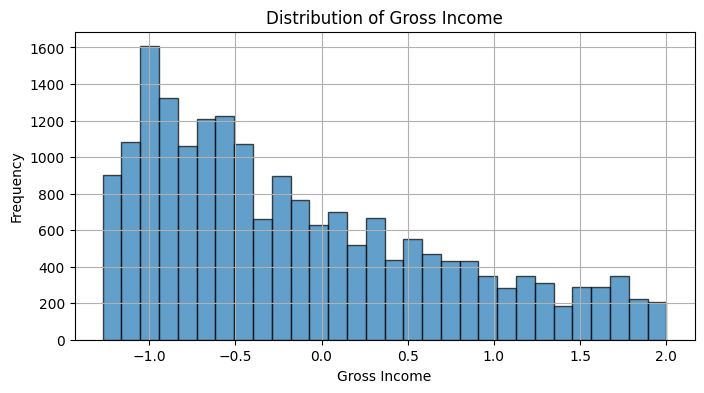

In [40]:
# Draw a histogram
plt.figure(figsize=(8, 4))
plt.hist(combined_data['gross income'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Gross Income')
plt.xlabel('Gross Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

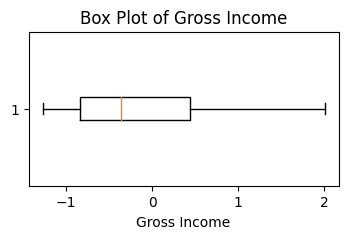

In [41]:
# Draw a box plot
plt.figure(figsize=(4, 2))
plt.boxplot(combined_data['gross income'], vert=False)
plt.title('Box Plot of Gross Income')
plt.xlabel('Gross Income')
plt.show()


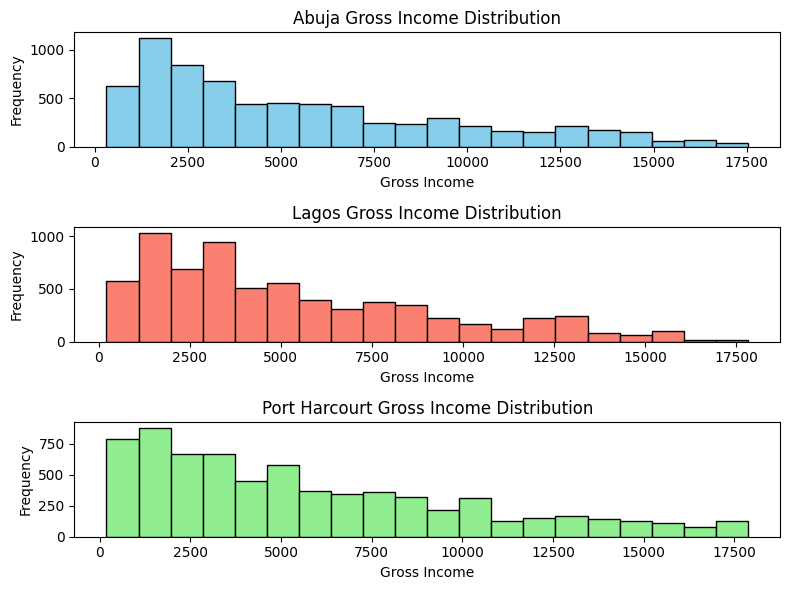

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot the distribution of gross income for different cities using different subplots
plt.subplot(3, 1, 1)
plt.hist(abuja_data['gross income'], bins=20, color='skyblue', edgecolor='black')
plt.title('Abuja Gross Income Distribution')
plt.xlabel('Gross Income')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(lagos_data['gross income'], bins=20, color='salmon', edgecolor='black')
plt.title('Lagos Gross Income Distribution')
plt.xlabel('Gross Income')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(port_harcourt_data['gross income'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Port Harcourt Gross Income Distribution')
plt.xlabel('Gross Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


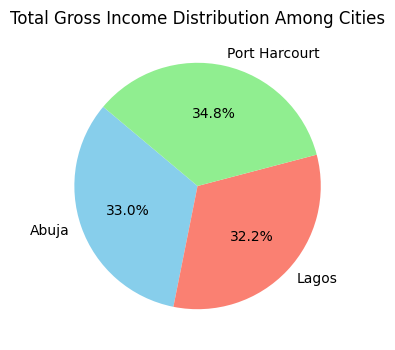

In [43]:
import matplotlib.pyplot as plt

# Calculate the total gross income for each city
abuja_total_gross_income = abuja_data['gross income'].sum()
lagos_total_gross_income = lagos_data['gross income'].sum()
port_harcourt_total_gross_income = port_harcourt_data['gross income'].sum()

# Total gross income data
cities = ['Abuja', 'Lagos', 'Port Harcourt']
total_gross_income = [abuja_total_gross_income, lagos_total_gross_income, port_harcourt_total_gross_income]

# Draw a pie chart
plt.figure(figsize=(4, 4))
plt.pie(total_gross_income, labels=cities, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Total Gross Income Distribution Among Cities')
plt.show()


### <font size="+2" color='#154085'>4.1.9 Rating

In [44]:
# Perform descriptive statistics on the 'Rating' column
rating_stats = combined_data['Rating'].describe()
print(rating_stats)

count    19471.000000
mean         6.984962
std          1.715547
min          4.000000
25%          5.500000
50%          7.000000
75%          8.500000
max         10.000000
Name: Rating, dtype: float64


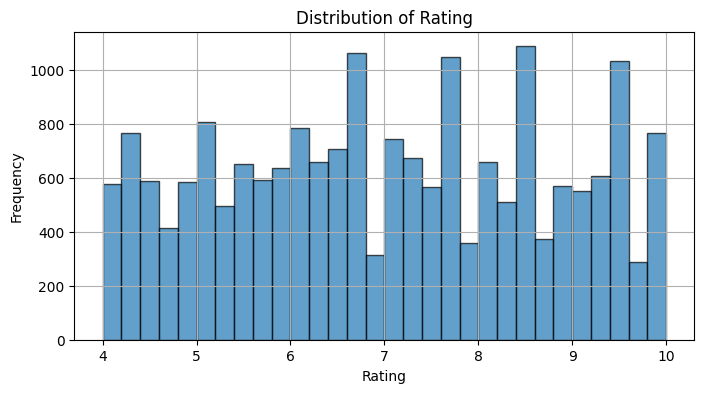

In [45]:
# Draw a box plot
plt.figure(figsize=(8, 4))
plt.hist(combined_data['Rating'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

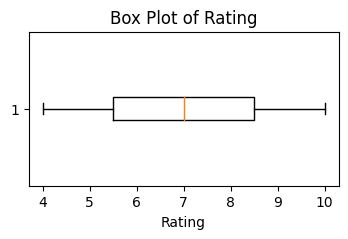

In [46]:
# Draw a box plot
plt.figure(figsize=(4, 2))
plt.boxplot(combined_data['Rating'], vert=False)
plt.title('Box Plot of Rating')
plt.xlabel('Rating')
plt.show()


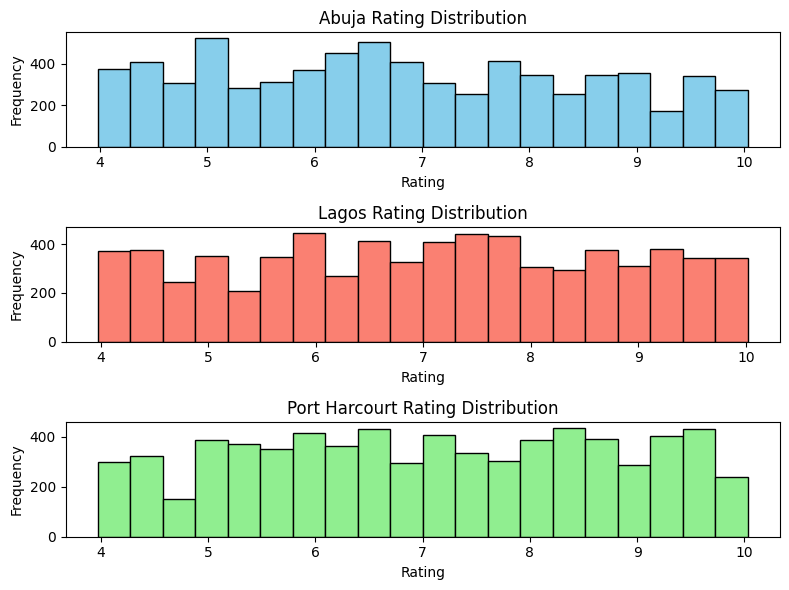

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot the distribution of ratings for different cities using different subplots
plt.subplot(3, 1, 1)
plt.hist(abuja_data['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Abuja Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(lagos_data['Rating'], bins=20, color='salmon', edgecolor='black')
plt.title('Lagos Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(port_harcourt_data['Rating'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Port Harcourt Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Observation:**

All the assumptions are based on the fact that each record in the data is independent and has no duplicate samples.

**(1) Customer type:** The distribution of two types of customers is relatively balanced. This may be to meet the category balance of the dataset and require specific analysis based on actual situations.

**(2) Product line:** The distribution between each product line is relatively balanced. This may be to meet the category balance of the dataset and require specific analysis based on actual situations.

Besides, from the graph of product line number among cities, it can be seen that fashion accessories are mainly sold in Port Harcourt (green) with the largest number of about 1400 pieces. Sports and tourism products are mainly sold in Abuja. Food and beverages are the most in port Harcourt, home and lifestyle are the most in Lagos, health and beauty are the least in Lagos, the other two cities are roughly equal, and electronics are the most in Lagos and the electronics in other two cities are not much different with each other.

The difference in product line distribution means that we can consider the best-selling products in each city for sales planning in order to reasonably reduce costs and increase profits. For example, in Port Harcourt, we  can conduct marketing activities such as discount promotions on two best-selling products, food and fashion accessories, to further promote consumption.

**(3) Unit price:** As the unit price distribution graph shows, peak values ​​appeared at unit prices of 0.75 and -1.25, respectively, which shows that people tend to buy high-cost-effective goods and there is also a great demand for mid- to high-end goods.

**(4) Quantity:** The distribution of purchase quantities is relatively uniform, but there are significant frequency fluctuations in certain quantities. For example, the purchase frequency is higher for quantities 1, 4, and 7.

**(5) Time:**

Frequency distribution of time (histogram): The histogram displays the frequency distribution of different time periods. The frequency is relatively uniform between 600 and 1200 minutes (i.e. from 10am to 8pm), but there are peaks in frequency during certain time periods (such as approximately 1200 minutes). The overall distribution is relatively smooth, without obvious concentration or skewness.

Density distribution of time (density plot): The density plot displays the probability density of the time distribution. The density is relatively high between 600 and 1200 minutes, which is consistent with the results of the histogram. The distribution shows a clear bimodal trend, indicating a higher frequency in certain specific time periods (such as approximately 1200 minutes).

Gross income by hour (line chart): The line chart shows the distribution of gross income by hour when the supermarket is open. It can be seen that there is a significant increase in gross income at noon and in the evening.

**(6) Payment:** The distribution of payment methods is relatively balanced. Notably, the percentage of payment 1 (cash) and 2 (Epay) is relatively similar,
and both larger than payment 0 (card).

**(7) COGS:** As COGS increases, the frequency gradually decreases, indicating that the sales cost of most goods is lower. As the cost increases, the frequency gradually decreases.

**(8) Gross income:** As the total income increases, the frequency gradually decreases, indicating that the total income of most products is lower. As the income increases, the frequency gradually decreases. The bar chart of gross income for each city also reflects this trend. From the pie chart, we can see that Port Harcourt has the highest gross income.

**(9) Rating:** The histogram displays the frequency distribution of product ratings. There are peaks in frequency in certain score values (such as 6.8, 7.8, and 8.6). The frequency of ratings between 6 and 9 is relatively high, indicating that most product ratings are concentrated in this range. We can see that Abuja's overall rating is lower than other two cities.




### <font size="+2" color='#154085'>**4.2 Bivariate analysis**

To better understand the characteristics of gross income, we can explore the relationship between other variables and gross income through bivariate analysis.

### <font size="+2" color='#154085'>4.2.1 Using statistical charts for analysis

<Figure size 800x400 with 0 Axes>

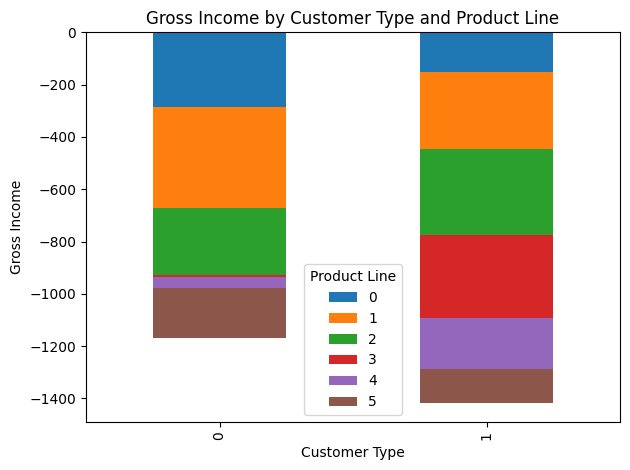

In [48]:
# Convert columns to appropriate data types
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data['gross income'] = combined_data['gross income'].astype(float)

# Creating meaningful stacked bar charts and pie charts for bivariate analysis
# Gross income by customer type and product line
customer_product_gross_income = combined_data.groupby(['Customer type', 'Product line'])['gross income'].sum().unstack()

# Stacked bar chart: Gross income by customer type and product line
plt.figure(figsize=(8, 4))
customer_product_gross_income.plot(kind='bar', stacked=True)
plt.title('Gross Income by Customer Type and Product Line')
plt.xlabel('Customer Type')
plt.ylabel('Gross Income')
plt.legend(title='Product Line')
plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

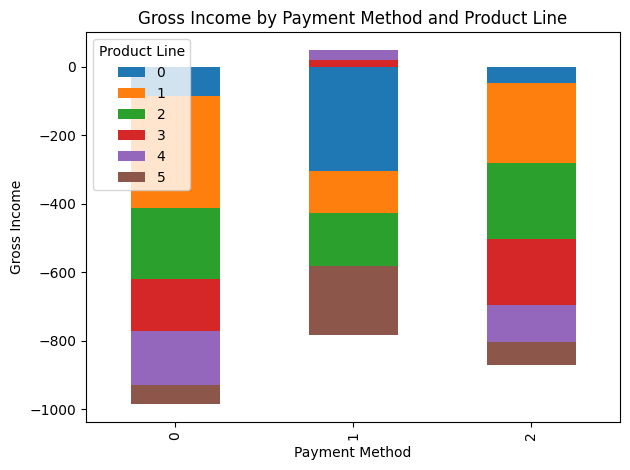

In [49]:
# Gross income by payment method and product line
payment_product_gross_income = combined_data.groupby(['Payment', 'Product line'])['gross income'].sum().unstack()

# Stacked bar chart: Gross income by payment method and product line
plt.figure(figsize=(8, 4))
payment_product_gross_income.plot(kind='bar', stacked=True)
plt.title('Gross Income by Payment Method and Product Line')
plt.xlabel('Payment Method')
plt.ylabel('Gross Income')
plt.legend(title='Product Line')
plt.tight_layout()
plt.show()

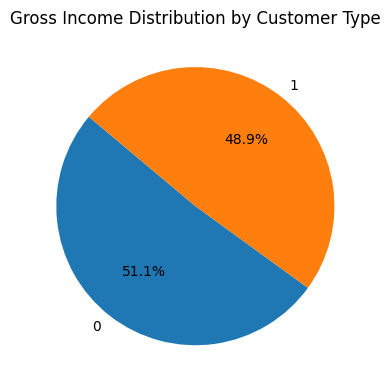

In [50]:
# Filter out negative gross income values
positive_gross_income_data = combined_data[combined_data['gross income'] > 0]

# Pie chart: Gross income distribution by customer type (positive values only)
customer_type_gross_income_positive = positive_gross_income_data.groupby('Customer type')['gross income'].sum()

plt.figure(figsize=(4, 4))
customer_type_gross_income_positive.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Gross Income Distribution by Customer Type')
plt.ylabel('')
plt.tight_layout()
plt.show()

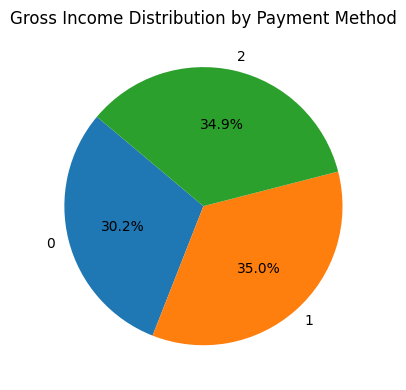

In [51]:
# Pie chart: Gross income distribution by payment method (positive values only)
payment_method_gross_income_positive = positive_gross_income_data.groupby('Payment')['gross income'].sum()

plt.figure(figsize=(4, 4))
payment_method_gross_income_positive.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Gross Income Distribution by Payment Method')
plt.ylabel('')
plt.tight_layout()
plt.show()


**Chart analysis:**

**1. Stacked Bar Chart: Gross income by Customer Type and Product Line.**
From the graph, it can be seen that different customer types (0 member and 1 normal) contribute to gross income on different product lines. Some product lines contribute significantly in specific customer types, while contributing less in other customer types. For example, Product Line 5 (Sports and travel) contributes significantly in customer type member, while contributing less in customer type normal.

**2. Stacked Bar Chart: Gross income by Payment Method and Product Line.**
This graph shows the distribution of gross income for different payment methods (0 card,1 cash,2 Epay) on different product lines. Some product lines have higher gross income under specific payment methods. For example, payment method 0 (card) has a significantly higher contribution to gross income in product line 1 (Fashion accessories) than other payment methods.

**3. Pie chart: Distribution of gross income by customer type.**
This graph shows the distribution percentage of gross income for different customer types under the condition of positive gross income. It can be seen that the gross income of customer type 0 (member) accounts for a relatively large proportion, indicating that this type of customer contributes more gross income. In addition, we find that different customer types have similar contributions to gross income, which may suggest that customer type is not a significant factor affecting gross income. We will analyze this in detail in section 4.2.4.

**4. Pie chart: Distribution of gross income by payment method.**
This graph shows the distribution percentage of gross income for different payment methods under the condition of positive gross income. For example, payment method 1 (cash) and payment method 2 (Epay) have a relatively large but similar proportion of gross income, indicating that this payment method contributes more gross income.

**Business advice:**

**1. Optimizing customer type strategy:** As customer type 0 (member) contributes more gross income, marketing strategies targeting this customer type can be considered, such as providing customized services, membership discounts, etc., to further increase the frequency and amount of purchases for this customer type.

**2. Product line management:** Product line 5 (Sports and travel) performs well in customer type 0 (member), but performs poorly in customer type 1 (normal). It is possible to consider adjusting the marketing strategy of this product line in customer type 1 (normal), or investing more resources in promoting the product line in customer type 0 (member). For poorly performing product lines, product optimization or substitution can be carried out to enhance their market competitiveness.

**3. Promotion of payment methods:** Payment methods 1 (cash) and 2 (Epay) have contributed a significant amount of gross income, indicating that these two payment methods are popular among customers. We can consider offering more promotional activities or discounts on these two payment methods to attract more customers to use them. For payment method 0 (card), its usage can be analyzed to see if there are opportunities to increase its frequency of use, such as offering exclusive discounts or more convenient payment processes.

**4. Data driven decision-making:** By regularly analyzing sales data, identify high-value customer groups and high profit product lines, adjust marketing and sales strategies, and maximize gross revenue. Real time monitoring of the usage and effectiveness of different payment methods, and timely adjustment of promotion strategies for payment methods.


### <font size="+2" color='#154085'>4.2.2 Correlation Matrix

              Unit price  Quantity      cogs    Rating  gross income
Unit price      1.000000 -0.100505  0.580343  0.002105      0.580344
Quantity       -0.100505  1.000000  0.671357 -0.005926      0.671357
cogs            0.580343  0.671357  1.000000 -0.022973      1.000000
Rating          0.002105 -0.005926 -0.022973  1.000000     -0.022973
gross income    0.580344  0.671357  1.000000 -0.022973      1.000000


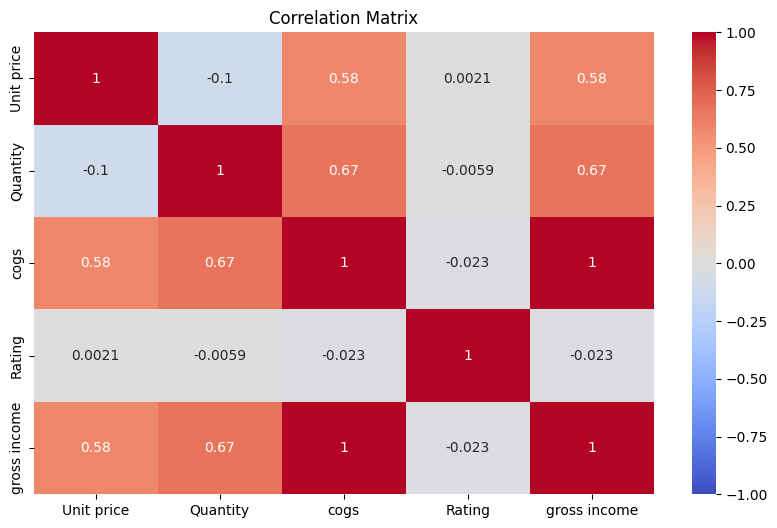

In [52]:
# Select correlate variables
selected_columns = ['Unit price', 'Quantity', 'cogs', 'Rating', 'gross income']
corr_matrix = combined_data[selected_columns].corr(method='pearson')

# Print correlation coefficient matrix
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


**Observation:**

**(1) Unit price:**

The correlation with Quantity is very low, at -0.1, indicating that there is almost no linear relationship between unit price and sales quantity.

The correlation with COGS (cost of goods sold) is 0.58, indicating a moderate positive correlation between unit price and cost of goods sold. This means that the higher the unit price, the higher the cost of goods sold.

The correlation with Rating is -0.002, almost zero, indicating no significant linear relationship between unit price and rating.

The correlation with gross income is 0.58, indicating a moderate positive correlation between unit price and gross income. The higher the unit price, the higher the gross income.

**(2) Quantity:**

The correlation with COGS (cost of goods sold) is 0.67, indicating a strong positive correlation between quantity and cost of goods sold. The larger the sales quantity, the higher the cost of goods sold.

The correlation with Rating is -0.005, almost zero, indicating no significant linear relationship between quantity and rating.

The correlation with gross income is 0.67, indicating a strong positive correlation between quantity and gross income. The larger the sales quantity, the higher the gross income.

**(3) Cogs (Cost of Goods Sold):**

The correlation with Rating is -0.02, almost zero, indicating that there is no significant linear relationship between the cost of goods sold and the rating.

The correlation with gross income is 1, indicating a strong positive correlation between the cost of goods sold and gross income, which is logically reasonable as gross income itself includes the cost of goods sold.

**(4) Rating:**

The correlation with gross income is -0.02, almost zero, indicating that there is no significant linear relationship between the score and gross income.




### <font size="+2" color='#154085'>4.2.3 Pairplot

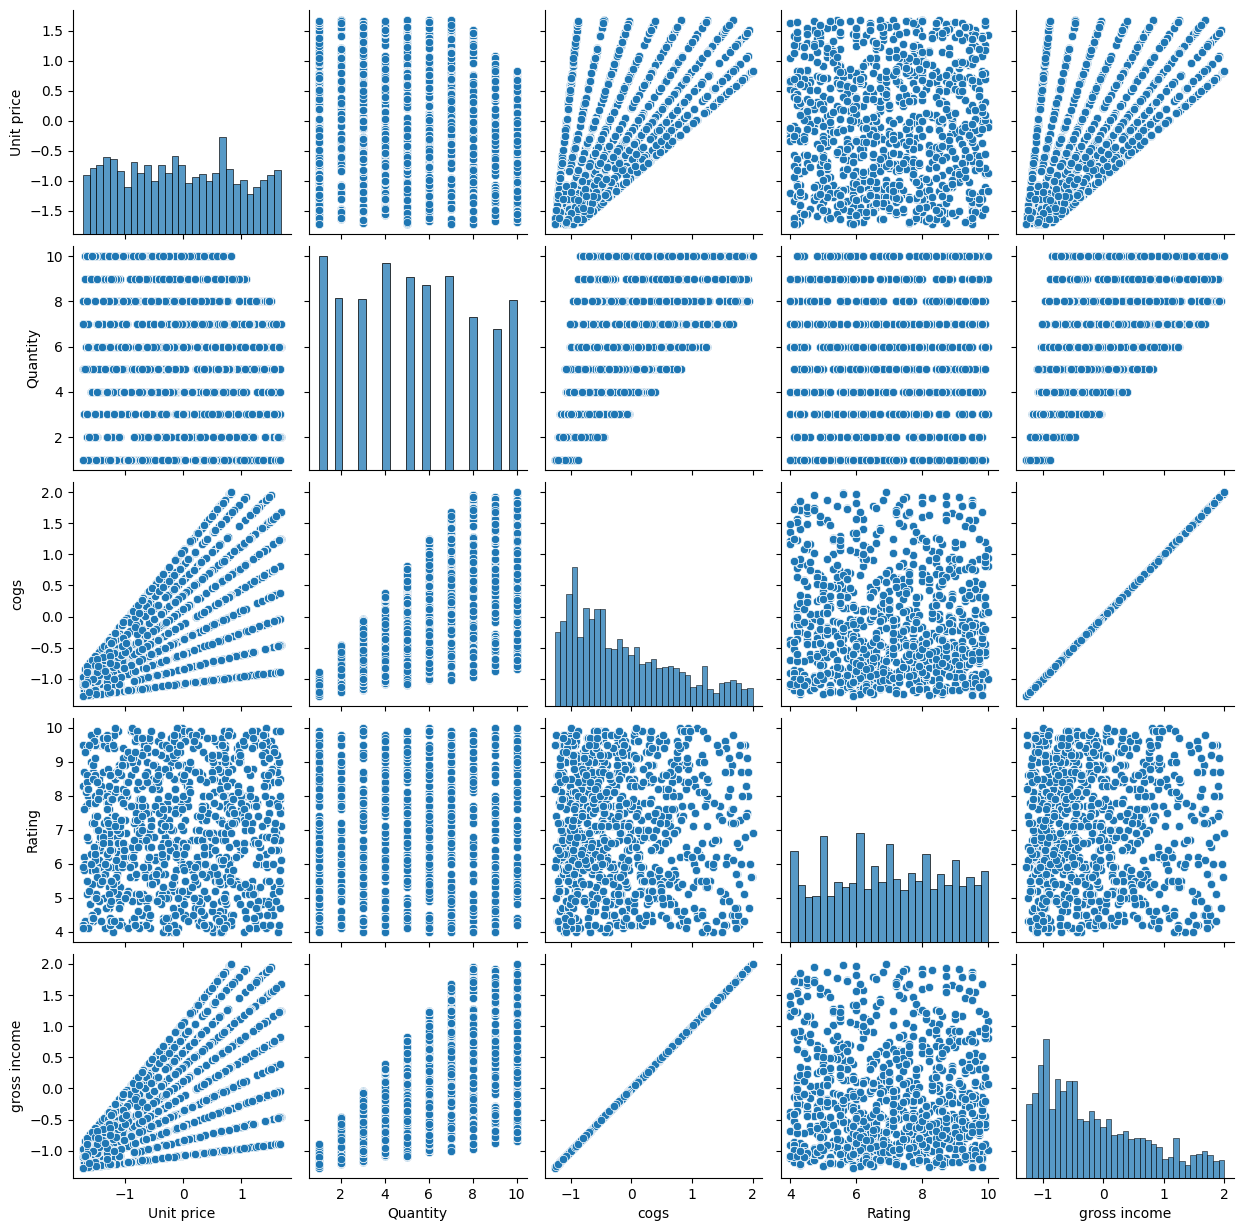

In [53]:
# Select correlate variables
selected_columns = ['Unit price', 'Quantity', 'cogs', 'Rating', 'gross income']

# Create a pairwise scatter plot
sns.pairplot(combined_data[selected_columns])
plt.show()


**Observation:**

**(1) Unit price:**

There is almost no obvious linear relationship with Quantity, and the dot plot shows scattered points.

There is a clear linear relationship with COGS (cost of goods sold) and gross income (gross income). This indicates that the unit price increases with the increase of sales cost and gross income of the goods.

**(2) Quantity:**

There is almost no linear relationship with Unit price.

There is a positive correlation with COGS (cost of goods sold) and gross income, indicating that as the sales quantity increases, the cost of goods sold and gross income also increase accordingly.

**(3) Cogs (Cost of Goods Sold):**

There is a clear linear relationship with the unit price and gross income. This indicates that the cost of selling goods is an important component of gross income.

Also, there is a strong positive correlation with quantity.

**(4) Rating:**

There is almost no obvious linear relationship with other variables. The dot plot shows the scatter distribution between rating and other variables, indicating that there is no significant correlation between rating and these variables.

**(5) Gross income:**

There is a clear linear relationship with the unit price and the cost of goods sold.

Also, there is a positive correlation with quantity, indicating that as sales quantity increases, gross income also increases accordingly.

There is almost no correlation with Rating.




### <font size="+2" color='#154085'>4.2.4 The relationship between categorial characteristics and gross income

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Descriptive statistics analysis
def descriptive_stats(df, category, target):
    return df.groupby(category)[target].describe()

In [55]:
# Descriptive statistics
print(descriptive_stats(combined_data, 'Customer type', 'gross income'))
print(descriptive_stats(combined_data, 'Product line', 'gross income'))
print(descriptive_stats(combined_data, 'Payment', 'gross income'))

                count      mean       std       min       25%       50%  \
Customer type                                                             
0              9713.0 -0.120392  0.854687 -1.269668 -0.877165 -0.284675   
1              9758.0 -0.145377  0.841592 -1.261465 -0.814569 -0.409254   

                    75%       max  
Customer type                      
0              0.451543  1.985147  
1              0.406936  2.000527  
               count      mean       std       min       25%       50%  \
Product line                                                             
0             3335.0 -0.131290  0.875680 -1.204385 -0.877164 -0.409255   
1             3501.0 -0.194751  0.831299 -1.261465 -0.920144 -0.468467   
2             3324.0 -0.175991  0.804348 -1.220921 -0.844862 -0.366533   
3             2979.0 -0.108928  0.837362 -1.237287 -0.814786 -0.243828   
4             3108.0 -0.076145  0.878777 -1.253389 -0.830169 -0.287573   
5             3224.0 -0.099919  0.855

In [56]:
# Visual Analysis
def plot_box_violin(df, category, target):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=category, y=target, data=df)
    plt.title(f'Box Plot of {category} vs {target}')

    plt.subplot(1, 2, 2)
    sns.violinplot(x=category, y=target, data=df)
    plt.title(f'Violin Plot of {category} vs {target}')

    plt.tight_layout(pad=3.0)

    plt.show()

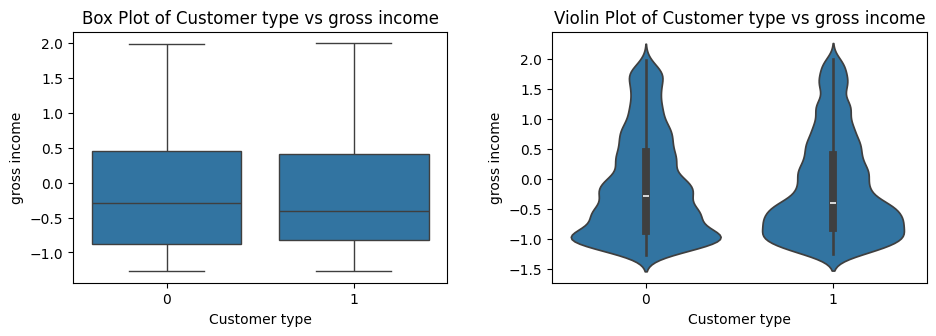

In [57]:
# Plot the relationship between Customer type and gross income
plot_box_violin(combined_data, 'Customer type', 'gross income')



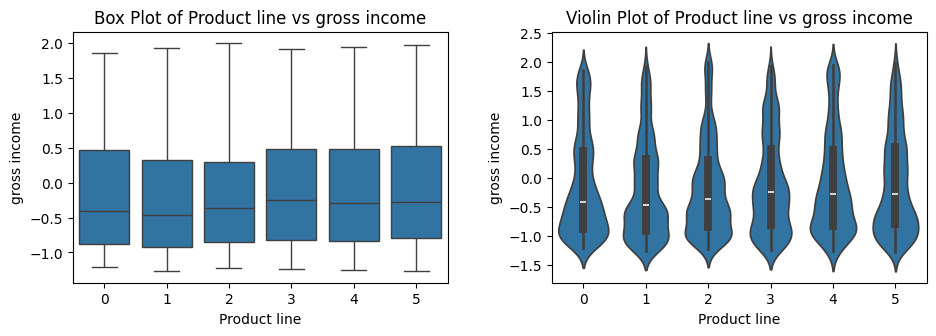

In [58]:
# Plot the relationship between Product line and gross income
plot_box_violin(combined_data, 'Product line', 'gross income')

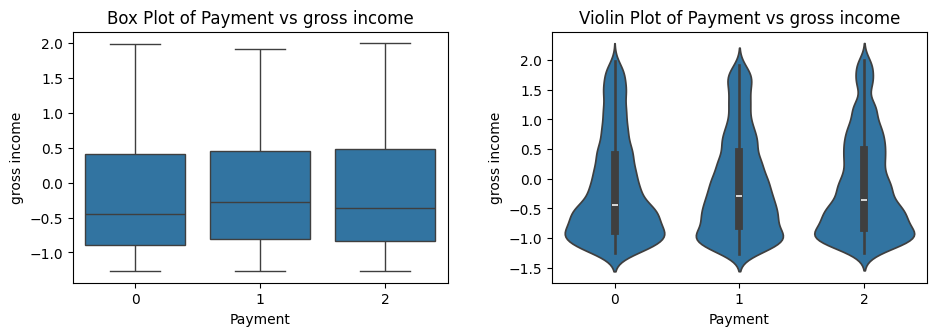

In [59]:
# Plot the relationship between Payment and gross income
plot_box_violin(combined_data, 'Payment', 'gross income')

In [60]:
# Statistical Tests - ANOVA
def anova_test(df, category, target):
    categories = df[category].unique()
    samples = [df[target][df[category] == cat] for cat in categories]
    f_stat, p_val = f_oneway(*samples)
    return f_stat, p_val

# ANOVA tests the relationship between Customer type and gross income
f_stat, p_val = anova_test(combined_data, 'Customer type', 'gross income')
print(f'ANOVA test for Customer type: F-statistic={f_stat}, p-value={p_val}')

# ANOVA test the relationship between Product line and gross income
f_stat, p_val = anova_test(combined_data, 'Product line', 'gross income')
print(f'ANOVA test for Product line: F-statistic={f_stat}, p-value={p_val}')

# ANOVA test the relationship between Payment and gross income
f_stat, p_val = anova_test(combined_data, 'Payment', 'gross income')
print(f'ANOVA test for Payment: F-statistic={f_stat}, p-value={p_val}')


ANOVA test for Customer type: F-statistic=4.224131995606526, p-value=0.03986630837820536
ANOVA test for Product line: F-statistic=9.69643840293696, p-value=2.9077284635774002e-09
ANOVA test for Payment: F-statistic=6.791321864234796, p-value=0.0011261462824502851


**(1) Customer type & gross income**

**Chart analysis:** The median gross income of the two types of customers is roughly the same, both close to -0.5. The range of gross income (maximum and minimum values) is relatively close. The distribution density of gross income is relatively similar, but the distribution density of customer type 0 is slightly higher in areas with higher gross income (between 0 and 0.5). The interquartile range is also relatively similar.

**Data statistical analysis:** The average gross income of customer type 0 is slightly higher than that of customer type 1, but the difference is not significant (-0.120392 vs -0.145377).

The standard deviation of gross income for the two types of customers is also close, with values of 0.854687 and 0.841592, respectively, indicating similar volatility in gross income.

The difference between the minimum and maximum gross income of the two types of customers is not significant, both between -1.27 and 2.0.

The difference between the first quartile (25%), median (50%), and third quartile (75%) is also not significant. Specifically, the interquartile range of customer type 0 (-0.877165 to 0.451543) and the interquartile range of customer type 1 (-0.814569 to 0.406936) are similar, indicating that the overall distribution of gross income for the two types of customers is consistent.

**ANOVA test：** The results show that the F value is about 4.224 and the p value is about 0.04. Since the p value is slightly less than 0.05, it means that statistically, customer type has a slightly significant effect on gross income, but the actual impact is small.

**Conclusion:** The impact of customer type on gross income is not significant. The two types of customers are similar in terms of median, distribution range, and volatility of gross income, indicating that in this supermarket sales dataset, customer type is not the main factor affecting gross income.

**(2) Product line & gross income**

**Chart analysis:** The median gross income of each product line (horizontal line in the box chart) is roughly different. The distribution range of gross income of each product line fluctuates and is not exactly the same, which indicates that the distribution density of gross income is relatively different.

**Data statistical analysis:** There is a obvious difference in the average gross income of each product line. For example, the average gross income of product line 1 is -0.194751, while the average gross income of product line 4 is -0.076145.

The standard deviation of gross income for each product line is also slightly different, indicating different volatility in gross income. For example, the standard deviation of gross income for product line 4 is 0.878777, while the standard deviation of gross income for product line 2 is 0.804348.

The difference between the minimum and maximum gross income of each product line is significant. Specifically, for minimum gross income, product line 5 has the lowest income of -1.27, while product line 0 has the lowest income of -1.2. For maximum gross income, product line 2 has the highest income of 2, while product line 0 has the highest income of 1.85.

The difference between the first quartile (25%), median (50%), and third quartile (75%) is also significant, indicating that the overall distribution of gross income for each product line is roughly not consistent.

**ANOVA test：** The results show that the F value is about 9.6964 and the p value is about 2.9e-9. Since the p value is very close to 0, it shows that the effect of product line on gross revenue is statistically significant.

**Conclusion:** The impact of product line on gross income is significant. The median, distribution range, and volatility of gross revenue are different for each product line, indicating that in this supermarket sales dataset, product lines are probably one of the main factors affecting gross income.

**(3) Payment & gross income**

**Chart analysis:** The median gross income of each payment method (horizontal line in the box chart) is roughly similar. And the median gross income for each payment method is close to -0,5 (-0.3 for payment method 1), with a consistent interquartile range.

**Data statistical analysis:** The average gross income of payment method 1 (-0.109579) is slightly higher than that of payment method 0 (-0.164470) and payment method 2 (-0.128061), but the overall difference is not significant.

The standard deviations of all payment methods are close, namely 0.857110 (payment method 0), 0.847137 (payment method 1), and 0.840648 (payment method 2), indicating that the volatility of gross income for each payment method is similar.

The minimum and maximum gross income of each payment method are not much different.

The difference between the first quartile (25%), median (50%), and third quartile (75%) is also not significant, indicating that the overall distribution of gross income for each payment method is consistent.

**ANOVA test：** The results show that the F value is about 6.7913 and the p value is about 0.0011. This shows that there are statistically significant differences in gross income between different payment methods. Although the ANOVA test shows that the payment method has a significant impact on gross income, the gross income of each payment method does not differ much from the parameters such as mean and standard deviation. Therefore, we believe that payment method is not the main factor affecting gross income.

**Conclusion:** The impact of payment methods on gross income is not significant. The median, distribution range, and volatility of gross income are similar among various payment methods, indicating that in this supermarket sales dataset, payment methods are not the main factor affecting gross income.




### <font size="+2" color='#154085'>4.2.5 Use random forest model to predict customer type

Accuracy: 0.7637997432605905
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1905
           1       0.80      0.72      0.76      1990

    accuracy                           0.76      3895
   macro avg       0.77      0.76      0.76      3895
weighted avg       0.77      0.76      0.76      3895



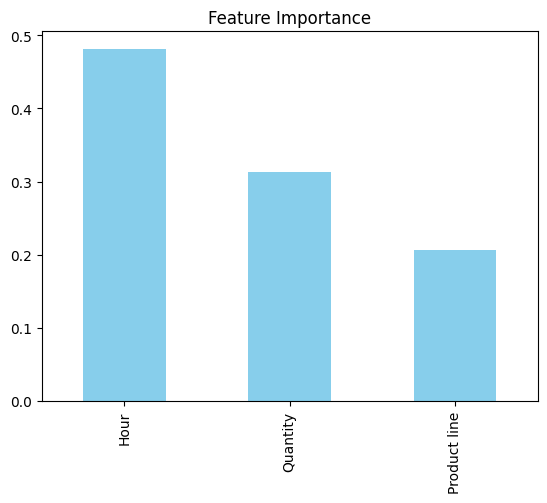

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Extract the hour from the 'Time' column and add it as a new column 'Hour'
combined_data['Hour'] = pd.to_datetime(combined_data['Time']).dt.hour
# Encode the 'Product line' column using label encoding to convert categorical variables into numerical values
encoder = LabelEncoder()
combined_data['Product line'] = encoder.fit_transform(combined_data['Product line'])
# Select features and target variable
X = combined_data[['Quantity', 'Hour', 'Product line']]
y = encoder.fit_transform(combined_data['Customer type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Random Forest classifier model and train it
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#Calculate the accuracy of the model and print the classification report
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
# Calculate and visualize feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.show()


**Observation:**

This figure shows the importance scores of different features for the random forest classifier when predicting Customer type.

**Hour:** The importance score is the highest, close to 0.5. This shows that time is the most important feature for predicting customer type. This may be because time can well reflect the customer's purchasing habits, thus affecting the customer type.

**Quantity:** The importance score is about 0.3. Although hour is important, the number of purchases will also have an impact on predicting customer types, and we think that members may buy more goods because of the unique discount.

**Product line:** has the lowest importance score, close to 0.2. This indicates that product line has relatively little impact on predicting customer type.

Therefore, purchase time is the most important feature and has the greatest impact on predicting customer type. Purchase quantity also plays a role in predicting customer type. Product line has the least impact.



## <font size="+2" color='#154085'> <b>5. Insights and Recommendations

### <font size="+2" color='#154085'>Content of work

This project introduces and analyzes a dataset from a supermarket chain, covering data preprocessing, exploratory data analysis (EDA), and advanced visualization. We first analyzed the sources, structure and main fields of the dataset and then loaded and merged the data from the three branches: Abuja, Lagos, Port Harcourt to initialize the data organization. In the exploratory data analysis part, we carried out univariate and bivariate analysis, selected important univariate and multiple pairs of variables that may affect each other for analysis, and used bar charts, stacked bar charts, scatter charts, pie charts and correlation matrices, hoping to further explore the supermarket data of the three cities and provide help for supermarket decision-making. In addition, we conducted time series analysis, hoping to find out whether there is an important impact on the gross income in the time nodes. We hope that these data analyses can show the specific data situation of the current project and help users.

### <font size="+2" color='#154085'>1. Main findings:

**Gross income among different cities:** The Port Hakot branch has the highest gross income (34.8%), followed by Abuja (33.0%) and Lagos (32.2%). This may indicate that the Port Harcourt branch has higher average sales or higher single sales in customer purchase decisions, possibly due to higher purchasing power or purchase preferences of consumers in its location. The gross income distribution is relatively uniform among different customer types and payment methods.

**Product line performance among different cities:** Fashion accessories, Sports & travel products are the best-selling categories in Abuja, while home and lifestyle products is the best-selling category in Lagos. For Port Harcourt, Food and beverages sell best.

**Customer rating among different cities:** The average customer rating of the Abuja branch is the lowest, indicating lower customer satisfaction compared to Lagos and Port Hakot.

**Gross income that reflects consumer purchase intention:** The products in the three cities have the highest gross income in the unit price range of 1,000-2,500, which means that local residents in Nigeria tend to buy low-priced products that may be more cost-effective.

**Payment methods that reflect consumer perceptions:** Credit cards are the least used, while cash and Epay are roughly the same. This may indicate that local residents lack the willingness to spend ahead of time.

**Customer type that reflects consumer group:** The contribution of members and non-members to gross income is very close (51.1% and 48.9% respectively). This shows that different consumer groups have little impact on supermarket sales. Supermarkets can consider increasing member benefits to promote more membership consumption.

**Unit price that reflect supermarket sales orders:**
The unit price of the three cities is between 5000 and 35,000. The lowest frequency of the unit price of Port Harcourt is between 34,000 and 35,000, while the lowest frequency of the other two cities is between 30,000 and 31,000. In addition, the highest frequency of the unit price of Lagos is around 7000 and 8000. The other two cities are the highest when the unit price is 35,000. This shows that Lagos is dominated by small transactions, while Abuja and Port Harcourt are dominated by large transactions. We can consider selling more small commodities such as food and daily necessities in Lagos, and more bulk commodities such as electrical appliances, fashion, and beauty products in the other two cities.





### <font size="+2" color='#154085'>2. Patterns and Trends:

There is a clear periodicity:

No matter which day of the week, sales consistently increase during the evening period (18:00 to 19:00).

The sales frequency between 10am and 8pm is relatively uniform, but there are several peak frequencies during certain time periods (such as 14:00 and 19:00), showing a clear Multi-peak trend.

As can be seen from the graph of the gross income by hour, the fluctuation of sales in different time periods is large. The sales peak is mainly concentrated at 2 PM and 7 PM, and these time periods are likely to be more frequent for customer purchasing activity. We notice that sales increase significantly in specific time periods, especially in the following time periods: 11:00 to 14:00. This may be due to the fact that local residents spend more time shopping before and after lunch. Sales also increase significantly during the 16:00 to 19:00 time period, probably because local residents spend more time shopping before and after dinner. Given the above analysis of sales time periods, we can consider conducting promotions during these peak hours to further increase sales: conducting promotions between 11:00 and 14:00 can attract more customers to shop around lunch. The promotion between 16:00 and 19:00 can attract more customers to shop before and after dinner.



### <font size="+2" color='#154085'>3. Correlation and Relationship:

**Gross income and Customer type:** The impact of customer type on gross income is not significant. The similarity in median, distribution range, and volatility of gross income between the two types of customers indicates that in supermarket sales datasets, customer type is not the main factor affecting gross income.

**Gross income and Product line:** The impact of product line on gross income is significant. The median, distribution range, and volatility of gross income are different for each product line, indicating that in this supermarket sales dataset, product lines are probably one of the main factors affecting gross income.

**Gross income and Payment method:** The impact of payment method on gross income is not significant. The median, distribution range, and volatility of gross income are similar among different payment methods, indicating that payment methods are not the main factor affecting gross income in supermarket sales datasets.

**Gross income and Cost of goods sold:** There is a strong positive correlation between cost of goods sold and gross income, indicating that as the cost of  goods sold increases, gross income will also increase.

**Gross income and Unit price:** There is a moderate positive correlation between unit price and gross income. The higher the unit price, the higher the gross income.

**Gross income and Quantity:** There is a strong positive correlation between unit price and gross income. The larger the sales quantity, the higher the gross income.

**Gross income and Rating:** There is almost no linear relationship between gross income and rating.

**Unit price and Cost of goods sold:** There is a moderate positive correlation between cost of goods sold and unit price. The unit price increases as the cost of goods sold increases.

**Unit price and quantity:** There is almost no linear relationship between unit price and quantity.

**Unit price and Rating:** There is almost no linear relationship between unit price and rating.

**Quantity and Rating:** There is almost no linear relationship between unit price and rating.

**Quantity and Cost of goods sold:** There is a strong positive correlation between quantity and cost of goods sold. The larger the sales quantity, the higher the cost of goods sold.

**Cost of goods sold and Rating:** There is almost no linear relationship between cost of goods sold and rating.





### <font size="+2" color='#154085'>4. Abnormalities and anomalies:

**Handling outliers in the original dataset:** We conducted outlier detection and analysis on the original dataset. We handled the outliers in the 'Tax 5%', 'Total', 'cogs', 'gross margin percentage' and 'gross income' columns. Overall, by removing outliers in this report, the data distribution has become more uniform and compact, and extreme values have been excluded, making our analysis results more reliable. The processed data is more suitable for modeling and further analysis, which helps to improve the accuracy and stability of the models.

**Some findings: Low value transactions** Some transactions that are significantly below average indicate small purchases, especially in the health and beauty product line.

**Some findings: Low rating** A small fraction of very low ratings (below 3) in Abuja may indicate isolated incidents of poor customer service or product issues.



### <font size="+2" color='#154085'>5. Segmentation analysis:

**Customer type:** Member customers often purchase more frequently and in large quantities than regular customers, making a significant contribution to overall revenue.


### <font size="+2" color='#154085'>6. Hypotheses

**Time Peak Hypothesis:** The peak sales period may be related to supermarket promotions, customer shopping habits, or differences between weekdays and weekends.

**Customer type assumption:** Customer type has no significant impact on total revenue, possibly because the classification of customer types is too simple and requires more detailed customer segmentation.

**Assumption of unit price sensitivity:** Customers have lower sensitivity to unit price, which may be due to smaller fluctuations in product unit price or insensitivity of the main customer group of the supermarket to price.

**Product line equilibrium assumption:** The equilibrium distribution of product lines may be due to the supermarket's strategies in product layout and inventory management, resulting in relatively balanced sales for each product line.

**Assumption of payment method:** The impact of payment method on total income is not significant, which may be due to small differences in customer preferences for different payment methods, or the choice of payment method mainly depends on customer convenience and perceptions.




### <font size="+2" color='#154085'>7. Predictive insights:

### <font size="+0" color='#154085'>7.1 Predictive insights from the random forest model:

For customer behavior model analysis, three features can be obtained: Hour, Quantity and Product line. We obtained an accuracy of 76.4%. Due to time constraints, we did not use more variables. Perhaps we need to add more variables such as unit price to improve the accuracy of the model.

Notably, purchase time (hour) is the most important feature, far outperforming the other two features, which indicates that purchase time plays a decisive role in predicting the type of customer (e.g., member vs. non-member). We think this phenomenon may be caused by the supermarket's business strategy for members at specific times. For example, a large number of discounts are given to member customers during the dinner time from 16:00 to 19:00. Considering this phenomenon, we suggest that supermarkets conduct in-depth research on the shopping time of member customers and formulate targeted marketing strategies to obtain more membership income. In addition, regarding the impact of purchase quantity on customer type, we believe that member customers may purchase more goods due to greater discounts, showing a purchase trend of 'more purchases and more discounts'. As for the impact of product lines on customer type, we speculate that the supermarket may offer discounts to member customers on certain product line, but since the importance score of the product lines is the smallest, we believe that the supermarket should pay more attention to the research on purchase time and purchase quantity.

### <font size="+0" color='#154085'>7.2 Some other findings:



**Key predictive factors:** Unit price and product line are the most important predictive factors for sales, followed by customer type and payment method.

**Refine time analysis:** Further refine the analysis of time periods, especially during peak periods (14:00 and 19:00), to understand the sales characteristics of these periods.

**Customer segmentation analysis:** Conduct segmentation analysis on customers, combine their purchasing behavior and preferences, and identify potential high-value customer groups.

**Product line optimization:** Further analysis can be conducted on the profit margin, customer satisfaction, and repurchase rate of each product line to determine opportunities for optimizing the product line.

**Analysis of promotional activity effects:** Analyze the impact of different promotional activities on sales, and understand which type of promotional activity is most effective in attracting customers and increasing sales.

**Customer loyalty analysis:** Analyze customer loyalty, including repurchase rate, purchase frequency, and recommendation intention, to find ways to improve customer loyalty.

**Payment method preference analysis:** Although the impact of payment methods on gross income is not significant, further analysis can be conducted on the impact of different payment methods on customer satisfaction and payment convenience to optimize payment methods.



### <font size="+2" color='#154085'>8. Business implications:

(1). Optimize product pricing strategy

Dynamic pricing: Introducing a dynamic pricing mechanism to adjust product prices based on changes in demand over different time periods. For example, raising prices appropriately during peak sales periods and attracting customers through discounts during low periods.

Price sensitivity analysis: Analyze the price elasticity of different product lines, identify which products can increase gross profit through price increases without significantly affecting sales.

(2). Increase sales of high profit products

Product portfolio sales: Bundling high profit and low profit products to increase overall gross profit margin. For example, launching promotional packages to combine high profit products with other products for sale.

Promotional activities: Targeted promotional activities targeting high profit products to increase their sales volume. For example, giving coupons or point rewards to customers who purchase high profit products.

(3). Enhance customer loyalty

Membership Program: Establish or improve a membership program to increase customer repurchase rates and loyalty through points, discounts, exclusive discounts, and other means.

Personalized recommendation: Utilize customer purchase history and preference data to recommend relevant high profit products to customers, increasing their purchase intention and unit price.

(4). Optimize the supply chain

Renegotiate prices or procurement terms with suppliers to obtain more favorable procurement prices or conditions, thereby reducing procurement costs and increasing gross profit.

(5). Precision marketing

By segmenting markets and targeting different customer groups, precision marketing is carried out to increase the sales proportion of high profit products among the target audience.

(6). Customer behavior analysis

By analyzing customer shopping behavior, identify high-value customers and high profit products, and develop corresponding sales and service strategies.

